In [ ]:
# Цель этого ноутбука - аппроксимация множества точек, полученных
# с помощью экспоненты с заданными параметрами многочленом какой-либо степени

In [35]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

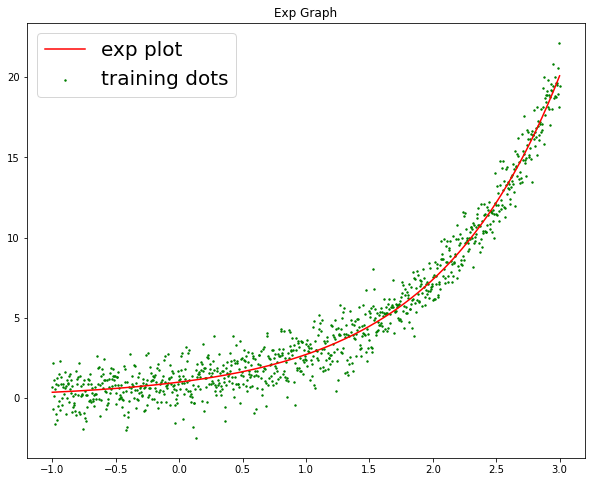

In [129]:
# Напишем функкцию генерации точек, где min_x и max_x - самая левый и правый концы экспоненты, A и B - параметры эксоненты, а
# scale и n_all - дисперсия распределения точек вокруг оригинальной эксоненты и количество точек, 
# которые используеются в аппроксимации
def generate_exp_wave(min_x, max_x, A, B, scale=1, n_all=1000):
    
    x_all = np.linspace(min_x, max_x, n_all)
    y_rand = A * np.exp(x_all) + B + np.random.normal(loc=0, scale=scale, size=n_all)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(x_all, np.exp(x_all), c='r', label='exp plot')
    plt.scatter(x_all, y_rand, s=2, c='g', label='training dots')
    plt.legend(loc='best', prop={'size':20})
    plt.title('Exp Graph')
    plt.show()
    
    return (x_all, y_rand, np.exp(x_all))
    
    
X, y, y_exp = generate_exp_wave(n_all=1000, min_x=-1, max_x=3, scale=1, A=1, B=3)
# Поделим наше множество точек на обучающую и тренировочную выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [154]:
MSE_degree = {}
for degree in range(1, 12):
    pipe = Pipeline([('poly', PolynomialFeatures(degree=degree, include_bias=False)), ('reg', LinearRegression())])
    pipe.fit(X_train.reshape(-1, 1), y_train)
    y_pred = pipe.predict(X_test.reshape(-1, 1))
    MSE = np.mean(np.abs(y_pred-y_test))
    MSE_degree[MSE] = (degree, pipe.get_params()['reg'].coef_)
    print('degree is %.3f and MSE is %.3f' % (degree, MSE))
print(f'\nMinimun of MSE reaches with %.i degree and coef are: {MSE_degree[min(MSE_degree.keys())][1]}'
      % MSE_degree[min(MSE_degree.keys())][0])

degree is 1.000 and MSE is 1.962
degree is 2.000 and MSE is 1.000
degree is 3.000 and MSE is 0.789
degree is 4.000 and MSE is 0.778
degree is 5.000 and MSE is 0.777
degree is 6.000 and MSE is 0.774
degree is 7.000 and MSE is 0.779
degree is 8.000 and MSE is 0.780
degree is 9.000 and MSE is 0.780
degree is 10.000 and MSE is 0.780
degree is 11.000 and MSE is 0.781

Minimun of MSE reaches with 6 degree and coef are: [ 0.90853369  0.53682761  0.25427228  0.0829518  -0.06298233  0.01855069]
